---
# <span style="color:blue">**Convolutional Neural Network**</span>

    Several attempts were made to configure CNNs for e.g. 1,2,3 convolutional layers with filters 16,32. With more filters (e.g. 64) as the number of parameters is extremely high the model was not able to run neither locally nor in google collabs. Also several attempts were made with different number of units in the dense layers and the number of dense layers. The maximum number of units that could be set to run a model is 128.
    
    - In all the attempts the validation and test accuracy was <=50-55%. From the results obtained, is clear that the accuracy of the model cannot be as high as using the high level features extracted from complex models trained on millions of images. 
    
    - Below only 3 configurations are presented. 
    
---

---
### **Define a function to plot results**
---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
    
def summarize_results(history):

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Plot loss values
    ax1.set_title('loss: {:.4f}'.format(history.history['val_loss'][-1]))
    ax1.plot(history.history['val_loss'], label='validation')
    ax1.plot(history.history['loss'], label='training')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend()

    # plot accuracy values
    ax2.set_title('accuracy: {:.2f}%'.format(history.history['val_acc'][-1]*100))
    ax2.plot(history.history['val_acc'], label='validation')
    ax2.plot(history.history['acc'], label='training')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')    
    ax2.legend()

    plt.show()

---
### **Load Data**
---

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Image Augmentation on training set 
train_generator = ImageDataGenerator(
            rescale=1./255,
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2, # skewing
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest' # for the pixels around 
)

test_generator = ImageDataGenerator(rescale=1/255)


# Train, validation and test sets
trainset = train_generator.flow_from_directory(
    os.path.join('swissroads', 'train'), batch_size=28, target_size=(256, 256),
    shuffle=True)

validset = test_generator.flow_from_directory(
    os.path.join('swissroads', 'valid'), batch_size=28, target_size=(256, 256),
    shuffle=False)

testset = test_generator.flow_from_directory(
    os.path.join('swissroads', 'test'), batch_size=5, target_size=(256, 256),
    shuffle=False)
    

Found 280 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


---
### **Define a basic model with 1 CNN**
---

In [3]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations

   
k_initializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01, seed=0)

# Model
model_1cnn = Sequential()
model_1cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_initializer=k_initializer, padding='same', strides=(1,1)))
model_1cnn.add(MaxPooling2D((2, 2)))
model_1cnn.add(Flatten())
model_1cnn.add(Dense(128, activation='relu', kernel_initializer=k_initializer))
model_1cnn.add(Dense(6, activation='softmax'))
model_1cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67108992  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 67,110,662
Trainable params: 67,110,662
Non-trainable params: 0
_________________________________________________________________


---
### **Define a function to run the model**
---

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

def run_model(model):
    
    # Compile model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  
    
    # End training when accuracy stops improving 
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                                   verbose=1, patience=6)
    
    # Checkpoint for storing learning parameters before overfitting 
    #checkpoint = ModelCheckpoint('weights_basic.hdf5', monitor='val_loss',
    #                            save_best_only=True)
    

    # Train model
    history = model.fit_generator(
        generator=trainset, 
        #steps_per_epoch=10,
        validation_data=validset, 
        #validation_steps=5,
        epochs=100, 
        #callbacks=[checkpoint,early_stopping]
        callbacks=[early_stopping]
    )   

    # Evaluate model
    test_loss, test_accuracy = model.evaluate_generator(testset)
    print('Test loss: {:.2f}, accuracy: {:.2f}%'.format(test_loss, test_accuracy*100))

    summarize_results(history)

---
## **Run basic model with 1 CNN**
---

Epoch 1/100
10/10 [==============================] - 46s 5s/step - loss: 2.8832 - acc: 0.1750 - val_loss: 1.7913 - val_acc: 0.1511
Epoch 2/100
10/10 [==============================] - 46s 5s/step - loss: 1.7905 - acc: 0.1964 - val_loss: 1.7891 - val_acc: 0.2590
Epoch 3/100
10/10 [==============================] - 37s 4s/step - loss: 1.7878 - acc: 0.2357 - val_loss: 1.7795 - val_acc: 0.2662
Epoch 4/100
10/10 [==============================] - 37s 4s/step - loss: 1.7810 - acc: 0.2714 - val_loss: 1.7648 - val_acc: 0.3237
Epoch 5/100
10/10 [==============================] - 40s 4s/step - loss: 1.7729 - acc: 0.2714 - val_loss: 1.7527 - val_acc: 0.2374
Epoch 6/100
10/10 [==============================] - 41s 4s/step - loss: 1.7266 - acc: 0.3214 - val_loss: 1.7056 - val_acc: 0.3381
Epoch 7/100
10/10 [==============================] - 45s 5s/step - loss: 1.7231 - acc: 0.3607 - val_loss: 1.6678 - val_acc: 0.3741
Epoch 8/100
10/10 [==============================] - 36s 4s/step - loss: 1.7024 - a

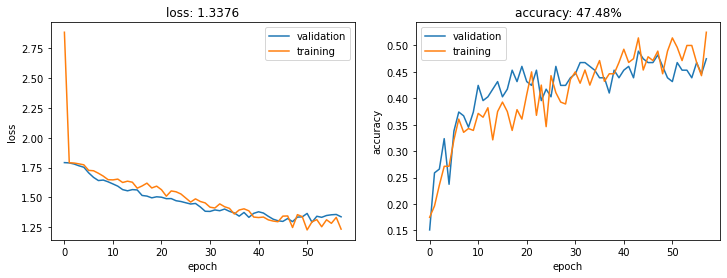

In [5]:
run_model(model_1cnn)

In [6]:
# Save this model
model_1cnn.save('model_1cnn.h5')

---
## **Load basic model and add one more CNN. Freeze training on trained CNN**
---

In [7]:
# Load model
model_1cnn_s = keras.models.load_model('model_1cnn.h5')
model_1cnn_s.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67108992  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 67,110,662
Trainable params: 67,110,662
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Freeze 1st CNN
for layer in model_1cnn_s.layers[0:2]:
    layer.trainable = False

In [15]:
# Create the new model
model_2cnn = Sequential()

# Add the trained layers
for layer in model_1cnn_s.layers[0:2]:
    model_2cnn.add(layer)

# Add the 2nd CNN and the rest of the layers
model_2cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=k_initializer, padding='same', strides=(1,1)))
model_2cnn.add(MaxPooling2D((2, 2)))
model_2cnn.add(Flatten())
model_2cnn.add(Dense(128, activation='relu', kernel_initializer=k_initializer))
model_2cnn.add(Dense(6, activation='softmax'))
model_2cnn.summary()    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
Total para

In [16]:
# Check trainable status of layers
for layer in model_2cnn.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f75ff7cfa20> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f75ff7cfe80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f75fdbf7710> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f75fe1a27b8> True
<tensorflow.python.keras.layers.core.Flatten object at 0x7f75fdc1af28> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f75fdc1ae48> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f75fdbad198> True


Epoch 1/100
10/10 [==============================] - 31s 3s/step - loss: 1.7722 - acc: 0.2143 - val_loss: 1.7363 - val_acc: 0.2374
Epoch 2/100
10/10 [==============================] - 27s 3s/step - loss: 1.7498 - acc: 0.2500 - val_loss: 1.7196 - val_acc: 0.3237
Epoch 3/100
10/10 [==============================] - 28s 3s/step - loss: 1.7109 - acc: 0.3357 - val_loss: 1.6680 - val_acc: 0.3813
Epoch 4/100
10/10 [==============================] - 28s 3s/step - loss: 1.6779 - acc: 0.3429 - val_loss: 1.6079 - val_acc: 0.3237
Epoch 5/100
10/10 [==============================] - 28s 3s/step - loss: 1.6654 - acc: 0.3286 - val_loss: 1.5807 - val_acc: 0.3813
Epoch 6/100
10/10 [==============================] - 31s 3s/step - loss: 1.6270 - acc: 0.3464 - val_loss: 1.5704 - val_acc: 0.3597
Epoch 7/100
10/10 [==============================] - 25s 2s/step - loss: 1.6414 - acc: 0.3321 - val_loss: 1.5371 - val_acc: 0.4029
Epoch 8/100
10/10 [==============================] - 22s 2s/step - loss: 1.6019 - a

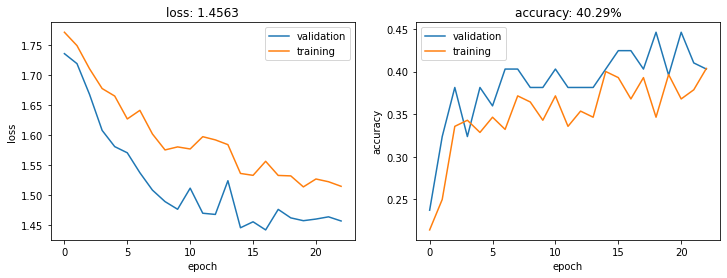

In [17]:
# run model
run_model(model_2cnn)

---
    Adding one more CNN does not improve the accuracy of the model.
---    

In [18]:
# Save this model
model_2cnn.save('model_2cnn.h5')

---
### **Load the model with 1 CNN and add one more dense layers before softmax**

    p.s. Resources are limited. Cannot run with more than 128 units on the first dense layer
---

In [11]:
model_1cnn_s = keras.models.load_model('model_1cnn.h5')
model_1cnn_s.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67108992  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 67,110,662
Trainable params: 67,110,662
Non-trainable params: 0
_________________________________________________________________


In [12]:
for layer in model_1cnn_s.layers[0:3]:
    layer.trainable = False

In [13]:
# Create the new model
model_1cnn_2 = Sequential()

# Add the 1st two layers
for layer in model_1cnn_s.layers[0:3]:
    model_1cnn_2.add(layer)


model_1cnn_2.add(Dropout(0.2))
model_1cnn_2.add(Dense(128, activation='relu'))
model_1cnn_2.add(Dense(64, activation='relu'))
model_1cnn_2.add(Dense(12, activation='relu'))
model_1cnn_2.add(Dense(6, activation='softmax'))
model_1cnn_2.summary()    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 524288)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               67108992  
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 12)                780       
__________

In [14]:
# Check trainable status of layers
for layer in model_1cnn_2.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f52abfd1dd8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f52abfdc240> False
<tensorflow.python.keras.layers.core.Flatten object at 0x7f52abfdc048> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f5268a71240> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f52abf010f0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f52abcae940> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f52abcaefd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f52aba3ebe0> True


Epoch 1/100
10/10 [==============================] - 30s 3s/step - loss: 1.7743 - acc: 0.2000 - val_loss: 1.7078 - val_acc: 0.2446
Epoch 2/100
10/10 [==============================] - 21s 2s/step - loss: 1.7185 - acc: 0.3214 - val_loss: 1.6646 - val_acc: 0.3597
Epoch 3/100
10/10 [==============================] - 21s 2s/step - loss: 1.7123 - acc: 0.3107 - val_loss: 1.6335 - val_acc: 0.3525
Epoch 4/100
10/10 [==============================] - 21s 2s/step - loss: 1.6525 - acc: 0.3357 - val_loss: 1.6154 - val_acc: 0.3597
Epoch 5/100
10/10 [==============================] - 21s 2s/step - loss: 1.6603 - acc: 0.3357 - val_loss: 1.5776 - val_acc: 0.3885
Epoch 6/100
10/10 [==============================] - 21s 2s/step - loss: 1.6287 - acc: 0.3821 - val_loss: 1.5555 - val_acc: 0.3741
Epoch 7/100
10/10 [==============================] - 21s 2s/step - loss: 1.6158 - acc: 0.3643 - val_loss: 1.5320 - val_acc: 0.3669
Epoch 8/100
10/10 [==============================] - 21s 2s/step - loss: 1.5658 - a

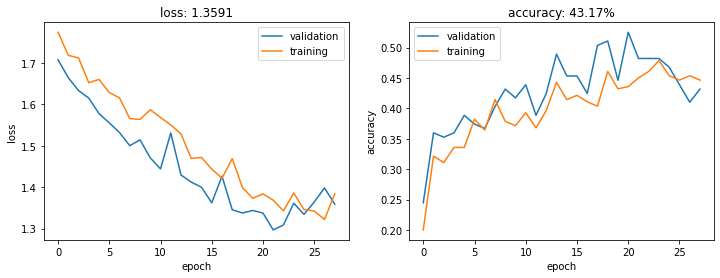

In [15]:
run_model(model_1cnn_2)

In [10]:
# Save this model
model_1cnn_2.save('model_1cnn_2.h5')

---
    Also adding more dense layers does not seem to improve the results
---

---
#### **Save test accuracy of first model**
---

In [17]:
import functions as fn

fn.save_test_accuracy('cnn.csv','cnn', 0.44)